In [520]:
from key import api_key
import requests
import pandas as pd 

#read all csv files and make the travel destinations be the index
states = pd.read_csv("state_travel.csv")
international = pd.read_csv("international_travel.csv")

# API Links
#response = requests.get("https://api.openweathermap.org/data/3.0/onecall/overview?lat={lat}&lon={lon}&appid={api_key}")
#api_url = f"https://api.openweathermap.org/data/3.0/onecall/overview?lat={lat}&lon={lon}&appid={api_key}"

# First we'll introduce the project to the user and ask the first questions to start looking at which category of locations we should ask about
print('Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.')

# We will use an error handling to ensure answer is either 'local' or 'international
intro_answers = ['international', 'local']

while True:
    try:
        location = input(f"First up, would you like to find a travel location internationally or within the U.S.? Please enter 'international' or 'local' for travel locations within the U.S.")
        if location not in intro_answers:
            raise Exception
        break
    except Exception:
        print(f"You entered: {location} \nPlease enter either 'international' or 'local' for your response, thank you!")

Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.
You entered: in the U.S. 
Please enter either 'international' or 'local' for your response, thank you!


You selected to find a travel destination within the U.S.! Here is a look at the top 10 most traveled states within the U.S.:


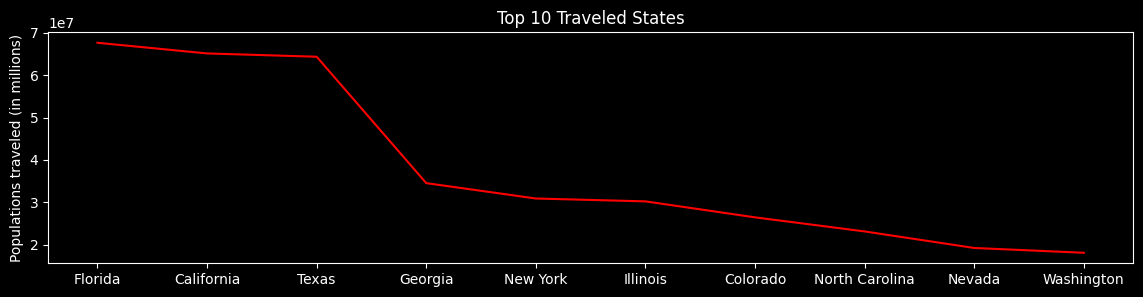

In [ ]:
# Organize and find top 10 for INTERNATIONAL destinations and LOCAL/U.S. STATE destinations #

# International dataset contains data from 1970-2020 for each country, NaN values, and other components as well. The use of filtering, conditions, and dropping missing values will be needed to help find the 10 countries with the largest amounts of traveling in a year and not including the U.S.
travel_year = international[international['Year'] == 2019] 
countries_only = travel_year[travel_year['Code'].str.len() <= 3].dropna()
international_only = countries_only[countries_only['Code'] != 'USA']
highest_international = international_only.nlargest(10, "Air transport, passengers carried")
highest_international

# State dataset contains only values from 2022 so no filtering by year will be needed. However the dataset does contain multiple categories for each state so we will need to filter in order to only obtain the 'Passenger' values
states_passengers = states[states['Category'] == 'Passengers'].dropna()
states_passengers['2022'] = states_passengers['2022'].str.replace(",", "").round().astype(int)
states_highest = states_passengers.nlargest(10, '2022')
states_highest

# Create visual graphs to show top 10 travel destinations based on what the user selected #
import matplotlib.pyplot as plt

if (location == 'local'):
    print('You selected to find a travel destination within the U.S.! Here is a look at the top 10 most traveled states within the U.S.:')
    
    plt.figure(figsize=(14, 3))
    plt.plot(states_highest['State'], states_highest['2022'], color = 'red')
    plt.title('Top 10 Traveled States')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.show
    
else: 
    print('You selected to find a travel destination internationally! Here is a look at the top 10 most traveled countries around the world:')
    
    plt.figure(figsize=(15, 3))
    plt.plot(highest_international['Entity'], highest_international['Air transport, passengers carried'], color = 'cyan')
    plt.title('Top 10 Traveled Countries')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.show

In [ ]:
# Ask 3 Questions to begin eliminating non-matches from their top 10 locations #

# Question 1: (Error handling to ensure answer for first question is either 'sunny', 'seasons', or 'snowy')
seasons_answers = ['season', 'sunny', 'wintry']

while True:
    try: 
        seasons = input("Do your ideal travel days look 'sunny', 'wintry', or like any other 'season'?")
        if seasons not in seasons_answers:
            raise Exception
        break
    except Exception:
        print("Please enter either 'sunny', 'wintry', or 'season' for your response. Thank you!")


# Question 2: (Error handling to ensure answer for second question is either 'historical' or 'attractions')
places_answers = ['historical', 'attractions']

while True:
    try:
        places = input("What does your ideal travel include more of? Historical places or attractions?") 
        if places not in places_answers:
            raise Exception
        break
    except Exception:
        print("Please enter either 'historical' or 'attractions' for your response. Thank you!")
        
# Question 3: (Error handling to ensure answer for third question is only an integer number and it's at least 350 or higher)
while True:
    try:
        expected_cost = int(input("What is your expected expenses (per person) for a week of vacation in USD? (Note: Average costs are at least $350+)"))
        if expected_cost < 350:
            raise Exception
        break
    except ValueError:
        print("Please enter your expected expenses in an integer format.")
    except Exception:
        print("Please enter a higher number in order to get a more accurate travel suggestion, thank you!")


Please enter either 'sunny', 'snowy', or 'seasons' for your response. Thank you!
Please enter either 'historical' or 'attractions' for your response. Thank you!
Please enter a higher number in order to get a more accurate travel suggestion, thank you!
Please enter your expected expenses in an integer format.


In [510]:
# Use OOP here to match and create rounds based on answers and responses
# International country matching -> dictionary? or case? #
# historical_places, seasons, expected_cost


# historical: China, Ireland, India, United Kingdom, Germany, Russia
# attractions: Japan, Turkey, Brazil, United Arab Emirates
# both: Turkey & United Kingdom

# Average costs per person in a week: China = $660, Ireland = $1,400, India = $350->$500, United Kingdom = $1,800->$2,200, Japan = $1,600->$2,000, Turkey = $900-$1,200, Germany = $1,500, Russia = $1,000->$1,500, Brazil = $700->$1,200, United Arab Emirates = $1,800->$2,500


In [511]:
# Local state matching #

In [512]:
# PARENT CLASSES will be used for both INTERNATIONAL and LOCAL locations. Will give a overview of their matched final location and its most popular travel destination #
class travel_locations:
    def __int__(self, location, travel_destination):
        self.location = location
        self.travel_destination = travel_destination
    
    def final_location(self):
        return f"Based on your answers, your travel match is {self.location}! They're most popular travel destinations are located in {self.travel_destination}."
    
# CHILD CLASSES will be used to detail their travel location and match with their answers #
class travel_details(travel_locations):
    def __init__(self, location, travel_destination, seasons, historical_places, expected_cost):
        super().__init__(self, location, travel_destination)
        self.seasons = seasons
        self.historical_places = historical_places
        self.expected_cost = expected_cost
        
        def answers_detailed(self):
            return f"Known for their {self.historical_places}, {self.location} is a {self.seasons} destination place with an average expected cost of {self.expected_cost} per week."

In [513]:
# Instances for INTERNATIONAL locations: Includes the top 10 coutries traveled and related information #
china = ("China", "Beijing")
ireland = ("Ireland", "Dublin")
india = ("India", "Agra")
united_kingdom = ("United Kingdom", "London")
japan = ("Japan", "Tokyo")
turkey = ("Turkey", "Istanbul")
germany = ("Germany", "Berlin")
russia = ("Russia", "Moscow")
brazil = ("Brazil", "Rio de Janeiro")
united_arab_emirates = ("United Arab Emirates", "Dubai")

In [514]:
# Instances for LOCAL locations: Includes the top 10 states traveled and related information #

florida = ("Florida", "Miami")
california = ("California", "Los Angeles & San Francisco")
texas = ("Texas", "Austin")
georgia = ("Georgia", "Atlanta")
new_york = ("New York", "New York City")
illinois = ("Illinois", "Chicago")
colorado = ("Colorado", "Denver")
north_carolina = ("North Carolina", "Charlott & Outer Banks")
nevada = ("Nevada", "Las Vegas")
washington = ("Washington", "Seattle")

# historical: Georgia, Illinois, New York, Washington
# attractions: Florida, California, Texas, Nevada, North Carolina, Colorado
# both: New York, California

# Average costs per person in a week: Florida=$1500->$2000, California=$1800->$2500, Texas=$1200->$1800, Georgia=$1200->$1800, New York=$2000->$2500, Illinois=$1,500->$2200, Colorado=$1500->$2000, North Carolina=$1200->$1700, Nevada=$1500->$2500, Washington=$1500->$2000

In [515]:

# First API: OpenWeather API will be used with final result to suggest the best time or month to travel with in alignment with their weather 

# Second API: TripAdvisor to suggest top places to visit during their travel month

In [ ]:

# Final results #

# print(f"Congratulations, your Travel 2025 suggestion is in {final_results}! The current weather there today is {final_weather}. For a {seasons} traveling time, we suggest booking a trip in {openweatherAPI_results}. Here are some of their top places to visit {tripAdvsiorAPI}. Below you will see further statistics and reports for {final_result}!")
# enter gif throguh giphy image API to lookup matching image to country or state? (OPTIONAL)
# data visualization use of graph to show how popular your travel location is in the month you travel vs year
# print(f"Hope you find {final result} to be a perfect travel match! Thank you for participating!')
